# 01 Data preprocessing
Haetaan tiedot

In [94]:
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

chronic_kidney_disease = fetch_ucirepo(id=336)

df = chronic_kidney_disease.data.original
df


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


Poistetaan turhat sarakkeet ja nimetään uudestaan lyhenteet käytetyistä sarakkeista


In [95]:
df = df.drop(columns=['rbc', 'pc', 'pcc', 'ba', 'sc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'])
df.rename(columns={'bp':'Blood pressure', 'sg':'Specific gravity', 'al':'Albumin', 'su':'Sugar', 'bgr':'Blood glucose random', 'bu':'Blood urea', 'sod':'Sodium', 'pot':'Potassium', 'hemo':'Hemoglobin', 'pcv':'Packed cell volume', 'wbcc':'White blood cell count', 'rbcc':'Red blood cell count'}, inplace=True)
df

,age,Blood pressure,Specific gravity,Albumin,Sugar,Blood glucose random,Blood urea,Sodium,Potassium,Hemoglobin,Packed cell volume,White blood cell count,Red blood cell count,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,NaN,NaN,15.4,44.0,7800.0,5.2,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,NaN,NaN,11.3,38.0,6000.0,NaN,ckd
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,NaN,NaN,9.6,31.0,7500.0,NaN,ckd
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,2.5,11.2,32.0,6700.0,3.9,ckd
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,NaN,NaN,11.6,35.0,7300.0,4.6,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,150.0,4.9,15.7,47.0,6700.0,4.9,notckd
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,141.0,3.5,16.5,54.0,7800.0,6.2,notckd
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,137.0,4.4,15.8,49.0,6600.0,5.4,notckd
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,135.0,4.9,14.2,51.0,7200.0,5.9,notckd


Muutetaan hemoglobiini g/dl -> g/l

In [96]:
df['Hemoglobin'] = df['Hemoglobin'] * 10
df['Hemoglobin']

0      154.0
1      113.0
2       96.0
3      112.0
4      116.0
       ...  
395    157.0
396    165.0
397    158.0
398    142.0
399    158.0
Name: Hemoglobin, Length: 400, dtype: float64

Muutetaan luokka sarakkeen arvot

In [97]:

df['class'] = df['class'].map({'ckd': 'a', 'notckd': 'c'})
len(df)

400

Poistetaan rivit, joissa on 3 tai enemmän tyhjiä arvoja

In [98]:
print('orginal lenght', len(df))
df = df[df.isna().sum(axis = 1) < 3]
print('new length', len(df))
df

orginal lenght 400
new length 265


,age,Blood pressure,Specific gravity,Albumin,Sugar,Blood glucose random,Blood urea,Sodium,Potassium,Hemoglobin,Packed cell volume,White blood cell count,Red blood cell count,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,NaN,NaN,154.0,44.0,7800.0,5.2,a
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,2.5,112.0,32.0,6700.0,3.9,a
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,NaN,NaN,116.0,35.0,7300.0,4.6,a
5,60.0,90.0,1.015,3.0,0.0,74.0,25.0,142.0,3.2,122.0,39.0,7800.0,4.4,a
6,68.0,70.0,1.010,0.0,0.0,100.0,54.0,104.0,4.0,124.0,36.0,NaN,NaN,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,150.0,4.9,157.0,47.0,6700.0,4.9,c
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,141.0,3.5,165.0,54.0,7800.0,6.2,c
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,137.0,4.4,158.0,49.0,6600.0,5.4,c
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,135.0,4.9,142.0,51.0,7200.0,5.9,c


# Dataframes

In [99]:
affected = df[df['class'] == 'a']
control = df[df['class'] == 'c']
control

,age,Blood pressure,Specific gravity,Albumin,Sugar,Blood glucose random,Blood urea,Sodium,Potassium,Hemoglobin,Packed cell volume,White blood cell count,Red blood cell count,class
250,40.0,80.0,1.025,0.0,0.0,140.0,10.0,135.0,5.0,150.0,48.0,10400.0,4.5,c
251,23.0,80.0,1.025,0.0,0.0,70.0,36.0,150.0,4.6,170.0,52.0,9800.0,5.0,c
252,45.0,80.0,1.025,0.0,0.0,82.0,49.0,147.0,4.4,159.0,46.0,9100.0,4.7,c
253,57.0,80.0,1.025,0.0,0.0,119.0,17.0,135.0,4.7,154.0,42.0,6200.0,6.2,c
254,51.0,60.0,1.025,0.0,0.0,99.0,38.0,135.0,3.7,130.0,49.0,8300.0,5.2,c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,150.0,4.9,157.0,47.0,6700.0,4.9,c
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,141.0,3.5,165.0,54.0,7800.0,6.2,c
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,137.0,4.4,158.0,49.0,6600.0,5.4,c
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,135.0,4.9,142.0,51.0,7200.0,5.9,c


In [100]:
affected

,age,Blood pressure,Specific gravity,Albumin,Sugar,Blood glucose random,Blood urea,Sodium,Potassium,Hemoglobin,Packed cell volume,White blood cell count,Red blood cell count,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,NaN,NaN,154.0,44.0,7800.0,5.2,a
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,2.5,112.0,32.0,6700.0,3.9,a
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,NaN,NaN,116.0,35.0,7300.0,4.6,a
5,60.0,90.0,1.015,3.0,0.0,74.0,25.0,142.0,3.2,122.0,39.0,7800.0,4.4,a
6,68.0,70.0,1.010,0.0,0.0,100.0,54.0,104.0,4.0,124.0,36.0,NaN,NaN,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,62.0,90.0,1.020,2.0,1.0,169.0,48.0,138.0,2.9,134.0,47.0,11000.0,6.1,a
244,64.0,90.0,1.015,3.0,2.0,463.0,64.0,135.0,4.1,122.0,40.0,9800.0,4.6,a
246,48.0,110.0,1.015,3.0,0.0,106.0,215.0,120.0,5.7,86.0,26.0,5000.0,2.5,a
248,59.0,70.0,1.010,1.0,3.0,424.0,55.0,138.0,4.5,126.0,37.0,10200.0,4.1,a


In [101]:
print('affected rows:', len(affected), 'control rows:', len(control))

affected rows: 126 control rows: 139


# Basic statistics

In [102]:
affected.describe()

,age,Blood pressure,Specific gravity,Albumin,Sugar,Blood glucose random,Blood urea,Sodium,Potassium,Hemoglobin,Packed cell volume,White blood cell count,Red blood cell count
count,123.000000,125.000000,125.000000,126.000000,126.000000,120.000000,125.000000,108.000000,108.000000,125.000000,125.000000,113.000000,108.000000
mean,57.081301,80.720000,1.013560,1.849206,0.809524,181.200000,80.420000,133.731481,4.751852,106.432000,32.440000,9450.442478,3.976852
std,14.465104,15.769305,0.004527,1.437038,1.366539,93.549394,60.501346,7.666661,4.203592,21.896507,7.150908,3720.458015,0.844510
min,6.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,104.000000,2.500000,31.000000,9.000000,2600.000000,2.100000
25%,49.500000,70.000000,1.010000,0.250000,0.000000,107.000000,37.000000,131.750000,3.800000,95.000000,29.000000,7100.000000,3.400000
50%,60.000000,80.000000,1.015000,2.000000,0.000000,158.000000,60.000000,136.000000,4.200000,108.000000,33.000000,9200.000000,3.900000
75%,65.000000,90.000000,1.015000,3.000000,1.000000,241.250000,107.000000,139.000000,4.900000,120.000000,37.000000,11000.000000,4.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,322.000000,145.000000,47.000000,161.000000,52.000000,26400.000000,8.000000


In [103]:
control.describe()

,age,Blood pressure,Specific gravity,Albumin,Sugar,Blood glucose random,Blood urea,Sodium,Potassium,Hemoglobin,Packed cell volume,White blood cell count,Red blood cell count
count,139.000000,137.000000,139.000000,139.0,139.0,135.000000,135.000000,136.000000,136.000000,137.000000,138.000000,136.000000,136.000000
mean,46.568345,71.313869,1.022482,0.0,0.0,107.385185,32.874074,141.735294,4.335294,151.883212,46.246377,7708.088235,5.380882
std,15.903719,8.559267,0.002509,0.0,0.0,18.747730,11.482257,4.792332,0.596351,12.845270,4.107695,1815.164727,0.592986
min,12.000000,60.000000,1.020000,0.0,0.0,70.000000,10.000000,135.000000,3.300000,130.000000,40.000000,4300.000000,4.500000
25%,34.000000,60.000000,1.020000,0.0,0.0,93.000000,23.500000,138.000000,3.700000,141.000000,43.000000,6300.000000,4.900000
50%,46.000000,70.000000,1.020000,0.0,0.0,107.000000,33.000000,141.000000,4.500000,150.000000,46.000000,7450.000000,5.300000
75%,58.000000,80.000000,1.025000,0.0,0.0,123.500000,44.000000,146.000000,4.900000,162.000000,50.000000,9225.000000,5.900000
max,80.000000,80.000000,1.025000,0.0,0.0,140.000000,50.000000,150.000000,5.000000,178.000000,54.000000,11000.000000,6.500000


# Histogram

Affected

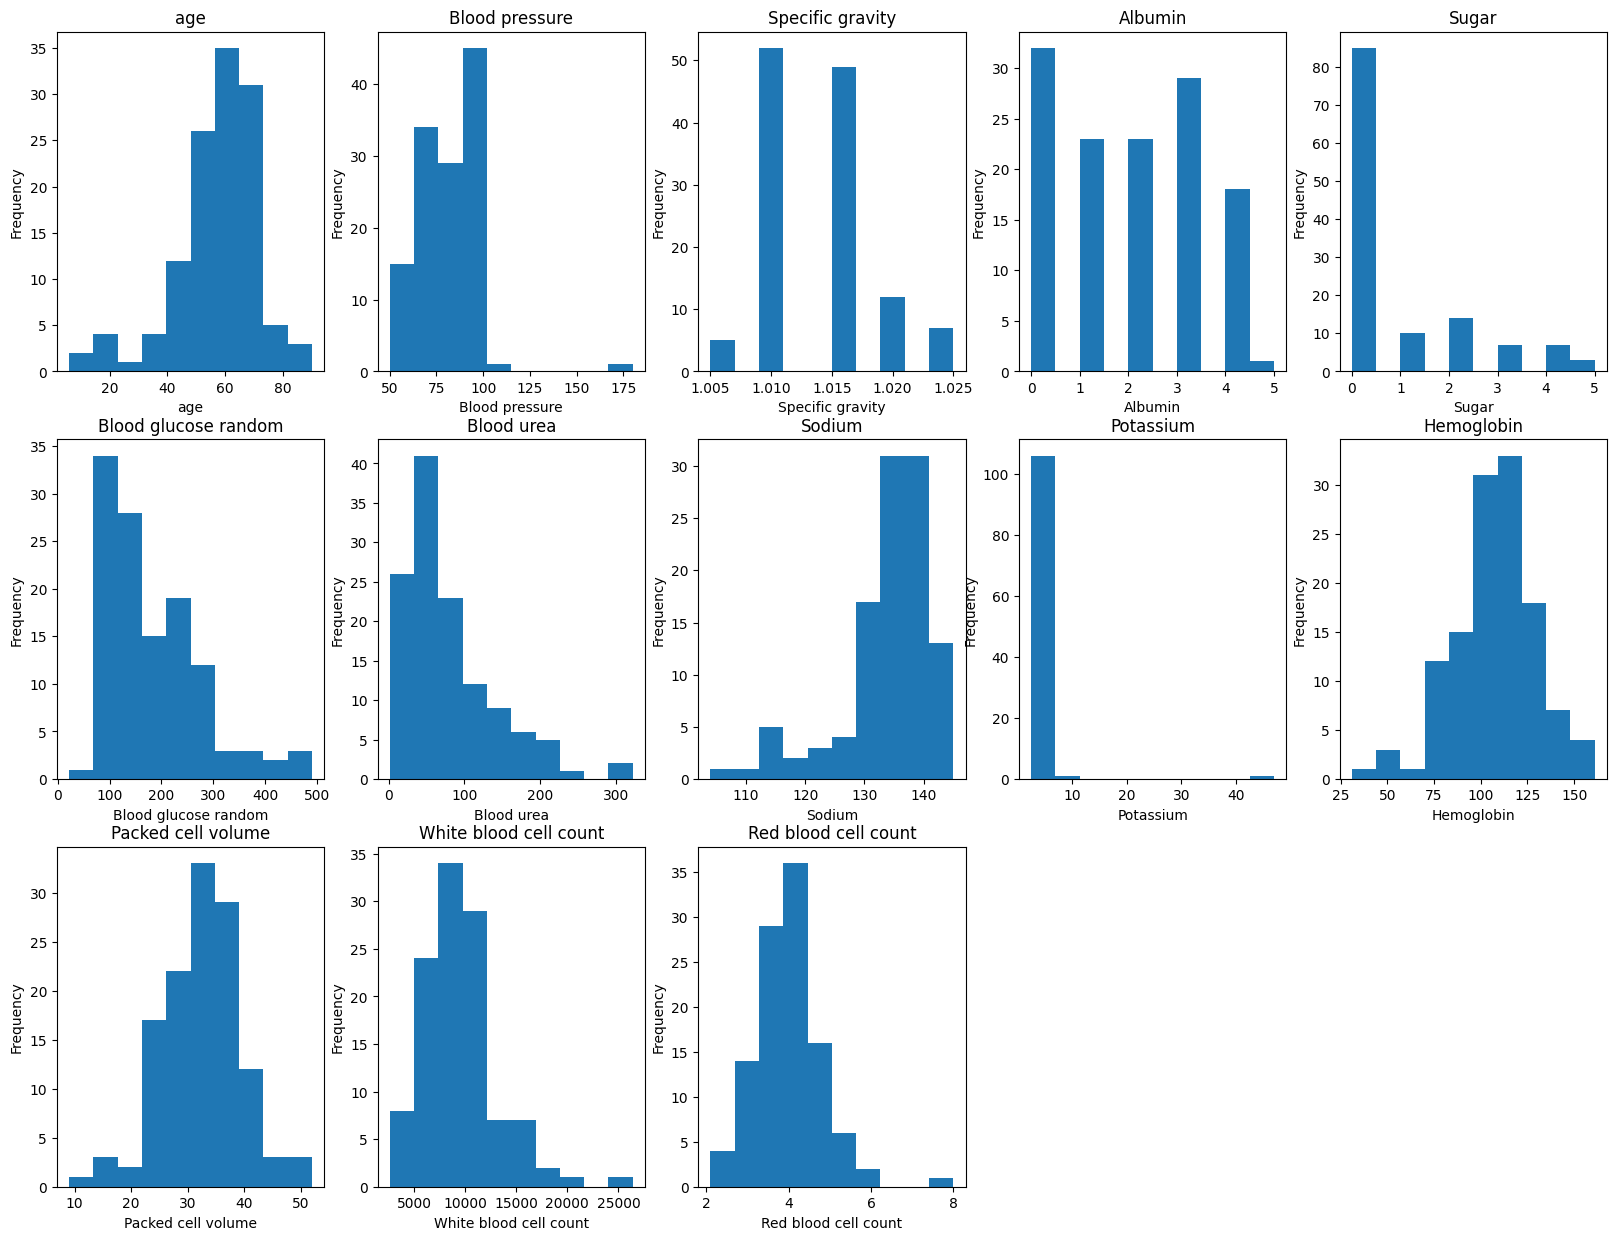

In [104]:
def plot_data(df):
    plt.figure(figsize=(20, 15))
    for i, col in enumerate(df.select_dtypes(include=['int', 'float']).columns):
        plt.subplot(3,5, i + 1)
        df[col].plot(kind='hist', title=col)
        plt.xlabel(col)
plot_data(affected)

Control

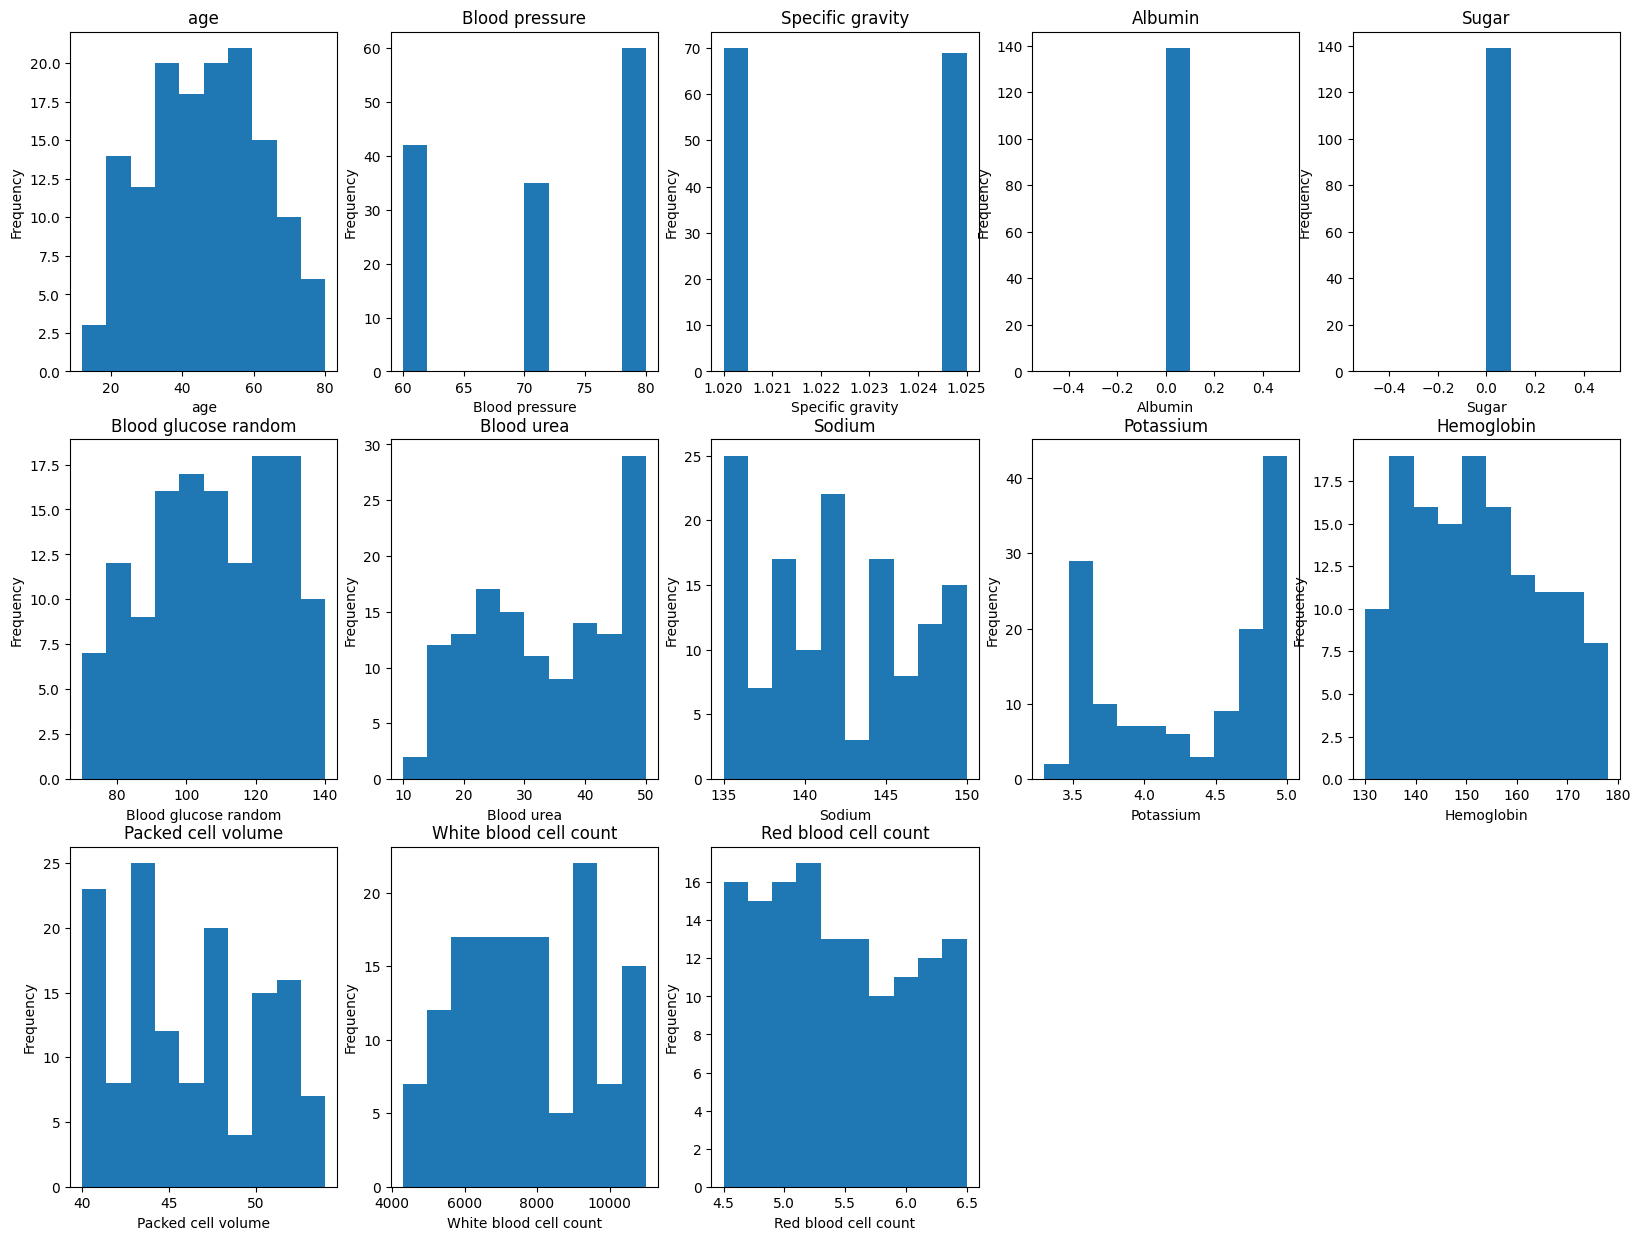

In [105]:
plot_data(control)

affected taulussa potassium arvo näyttää olevan väärin merkitty kummankin taulun perusteella

In [106]:
print('Max potassium in affected:', affected['Potassium'].max(), 'Max potassium in control:', control['Potassium'].max())

Max potassium in affected: 47.0 Max potassium in control: 5.0


In [107]:
affected = affected[affected['Potassium'] < 15]

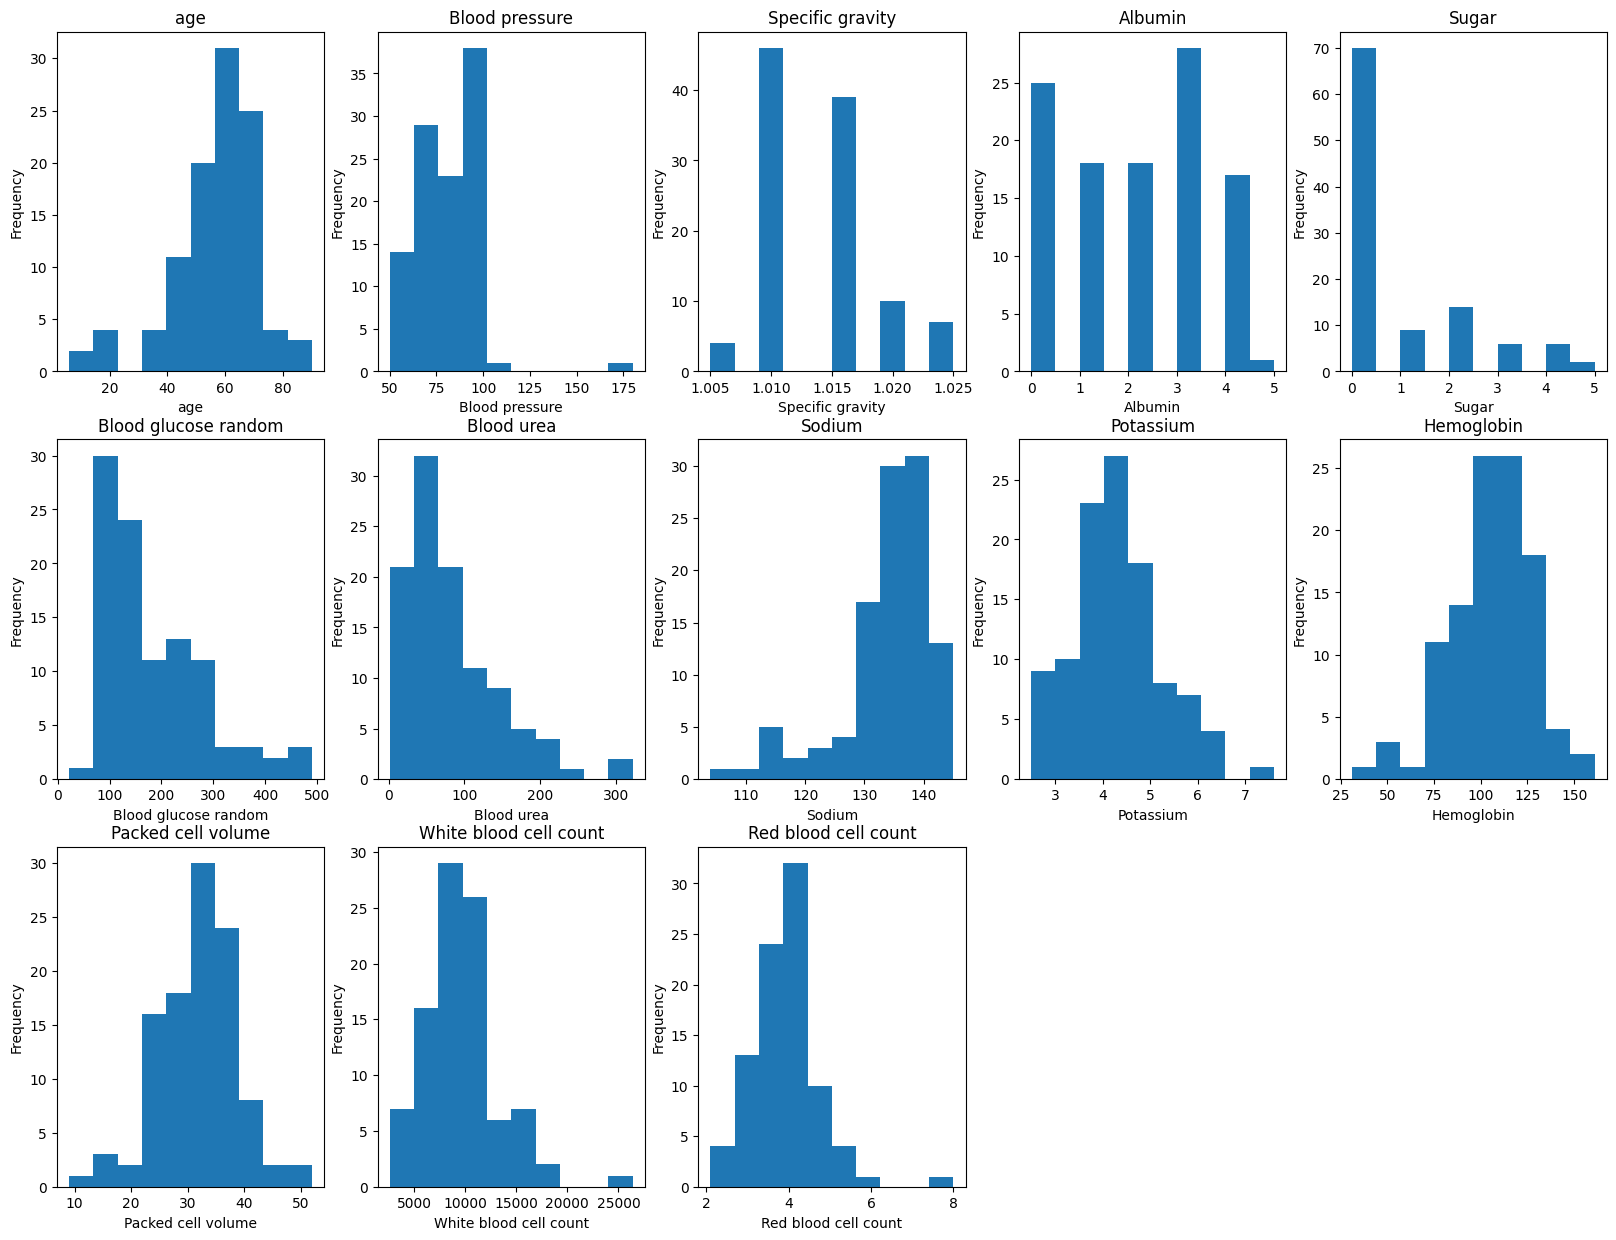

In [108]:
plot_data(affected)

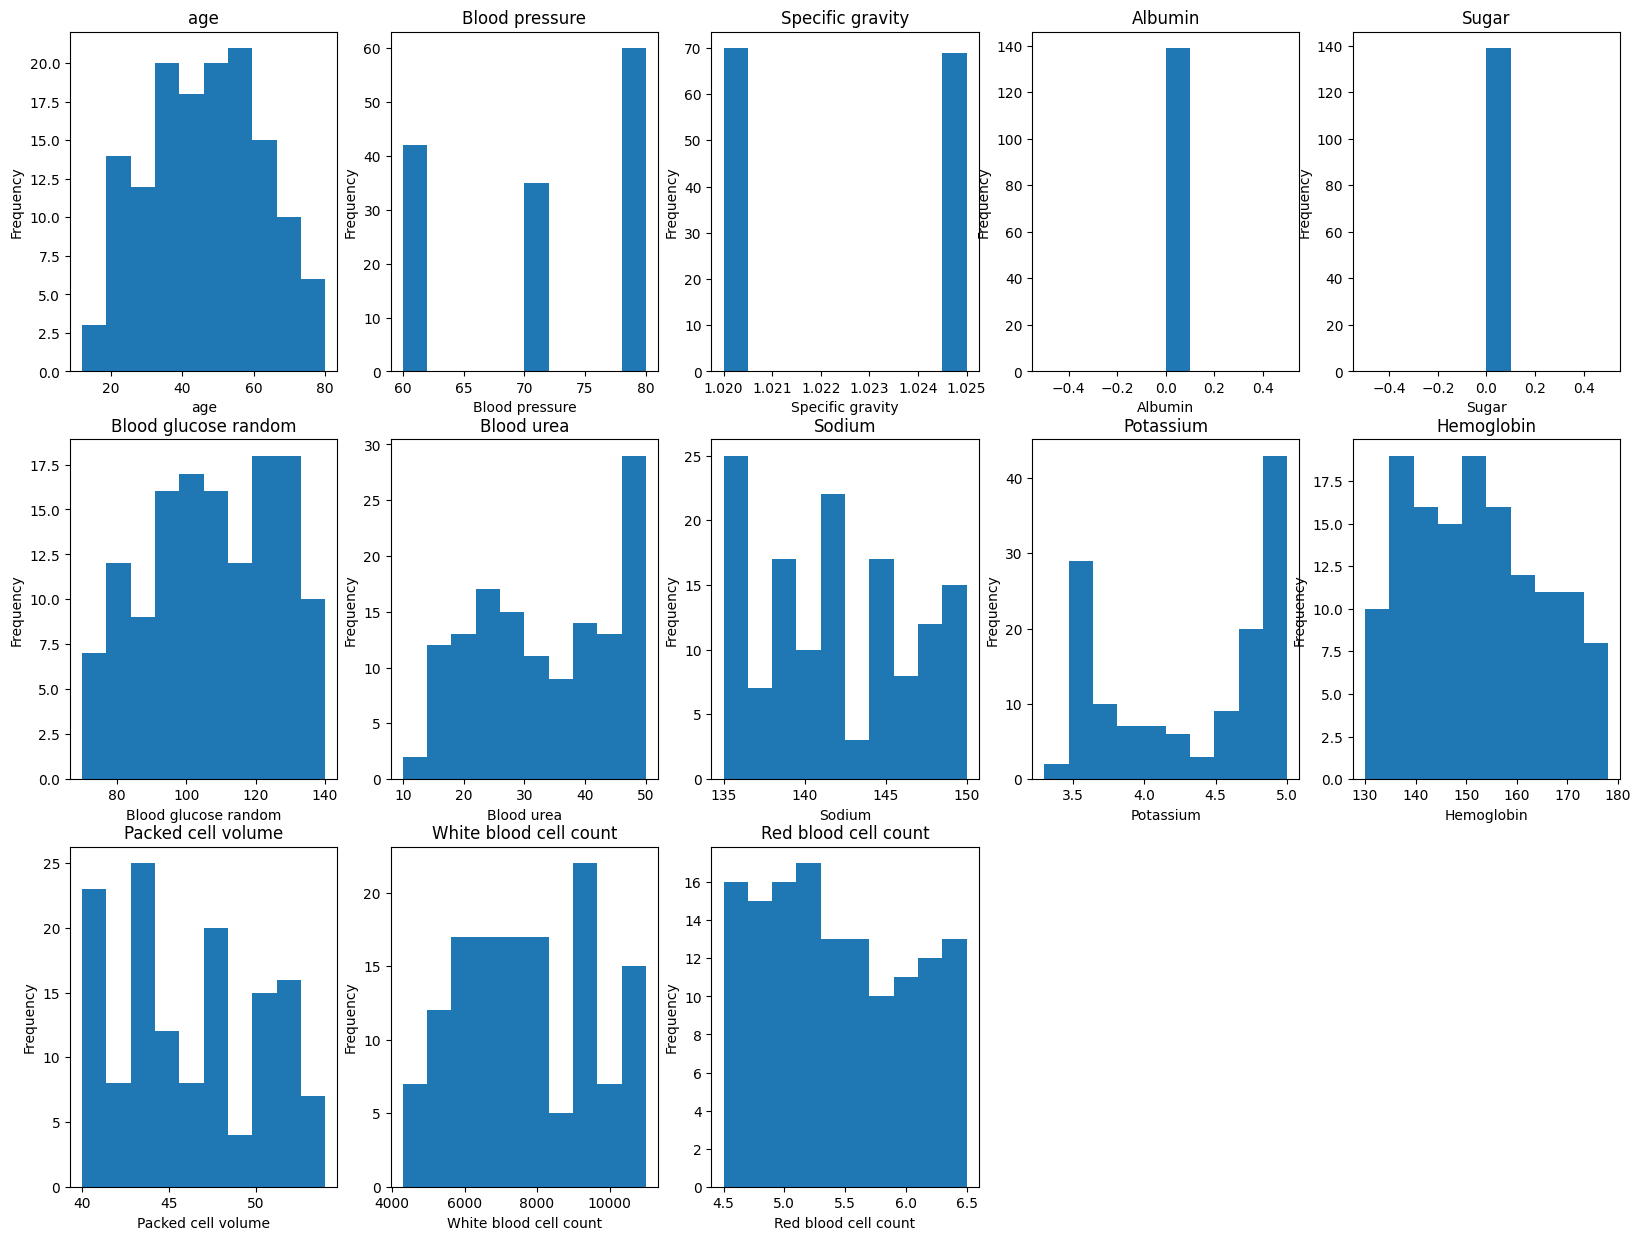

In [109]:
plot_data(control)

# Correlation matrix

In [110]:
affected_correlation = affected.corr(numeric_only=True)
control_correlation = control.corr(numeric_only=True)
affected_correlation

,age,Blood pressure,Specific gravity,Albumin,Sugar,Blood glucose random,Blood urea,Sodium,Potassium,Hemoglobin,Packed cell volume,White blood cell count,Red blood cell count
age,1.000000,0.054982,0.002462,-0.008500,0.218376,0.218858,-0.004048,-0.034255,0.112673,0.044864,0.002690,0.015058,0.035115
Blood pressure,0.054982,1.000000,0.091456,0.008252,0.219361,0.054506,0.065797,0.148939,0.066356,-0.083582,-0.076343,-0.011387,0.129246
Specific gravity,0.002462,0.091456,1.000000,-0.079704,-0.092843,-0.104826,-0.048188,0.143558,0.081370,0.101228,0.092194,0.000224,0.130521
Albumin,-0.008500,0.008252,-0.079704,1.000000,0.133261,0.108512,0.403552,-0.179718,0.214056,-0.332113,-0.277899,0.016192,-0.166194
Sugar,0.218376,0.219361,-0.092843,0.133261,1.000000,0.725651,-0.058301,0.054102,0.007099,0.180159,0.102901,0.156484,0.084150
Blood glucose random,0.218858,0.054506,-0.104826,0.108512,0.725651,1.000000,-0.047241,-0.053450,-0.099062,0.152377,0.087943,0.044738,0.148806
Blood urea,-0.004048,0.065797,-0.048188,0.403552,-0.058301,-0.047241,1.000000,-0.321538,0.337082,-0.602922,-0.575728,-0.212037,-0.471374
Sodium,-0.034255,0.148939,0.143558,-0.179718,0.054102,-0.053450,-0.321538,1.000000,0.054627,0.295516,0.318825,0.018575,0.268150
Potassium,0.112673,0.066356,0.081370,0.214056,0.007099,-0.099062,0.337082,0.054627,1.000000,-0.367749,-0.375956,-0.205597,-0.308399
Hemoglobin,0.044864,-0.083582,0.101228,-0.332113,0.180159,0.152377,-0.602922,0.295516,-0.367749,1.000000,0.951138,0.134208,0.745853


In [111]:
control_correlation

,age,Blood pressure,Specific gravity,Albumin,Sugar,Blood glucose random,Blood urea,Sodium,Potassium,Hemoglobin,Packed cell volume,White blood cell count,Red blood cell count
age,1.000000,-0.071093,-0.092814,NaN,NaN,0.101408,0.078620,0.110581,-0.094361,0.056334,-0.009969,0.128762,-0.045118
Blood pressure,-0.071093,1.000000,0.084470,NaN,NaN,0.004094,-0.084057,-0.107489,-0.064606,0.157748,-0.007854,-0.098981,-0.030603
Specific gravity,-0.092814,0.084470,1.000000,NaN,NaN,-0.038416,-0.050116,-0.033880,0.074253,0.026303,-0.007082,-0.028054,0.067207
Albumin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sugar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blood glucose random,0.101408,0.004094,-0.038416,NaN,NaN,1.000000,-0.067850,-0.007900,0.146784,-0.147729,-0.257604,-0.069143,-0.196675
Blood urea,0.078620,-0.084057,-0.050116,NaN,NaN,-0.067850,1.000000,0.005475,0.047313,0.085647,0.116931,0.041256,-0.010890
Sodium,0.110581,-0.107489,-0.033880,NaN,NaN,-0.007900,0.005475,1.000000,0.065758,-0.011060,-0.001524,0.338373,-0.092615
Potassium,-0.094361,-0.064606,0.074253,NaN,NaN,0.146784,0.047313,0.065758,1.000000,0.099223,-0.168690,0.041307,-0.052842
Hemoglobin,0.056334,0.157748,0.026303,NaN,NaN,-0.147729,0.085647,-0.011060,0.099223,1.000000,0.057235,-0.191126,0.075912


# Heatmap

In [112]:
def heatmap(correlation_matrix):
    plt.figure(figsize=(10, 10))
    plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
    plt.colorbar()
    plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
    plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
    plt.show()

Affected


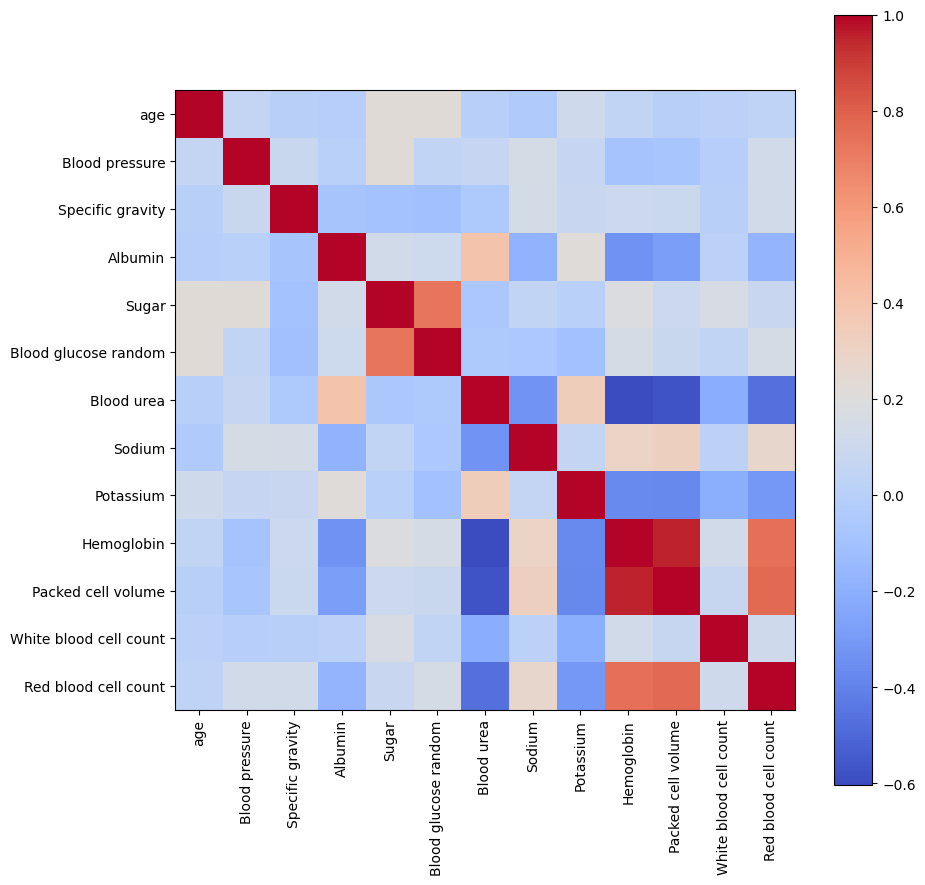

In [113]:
heatmap(affected_correlation)

Control


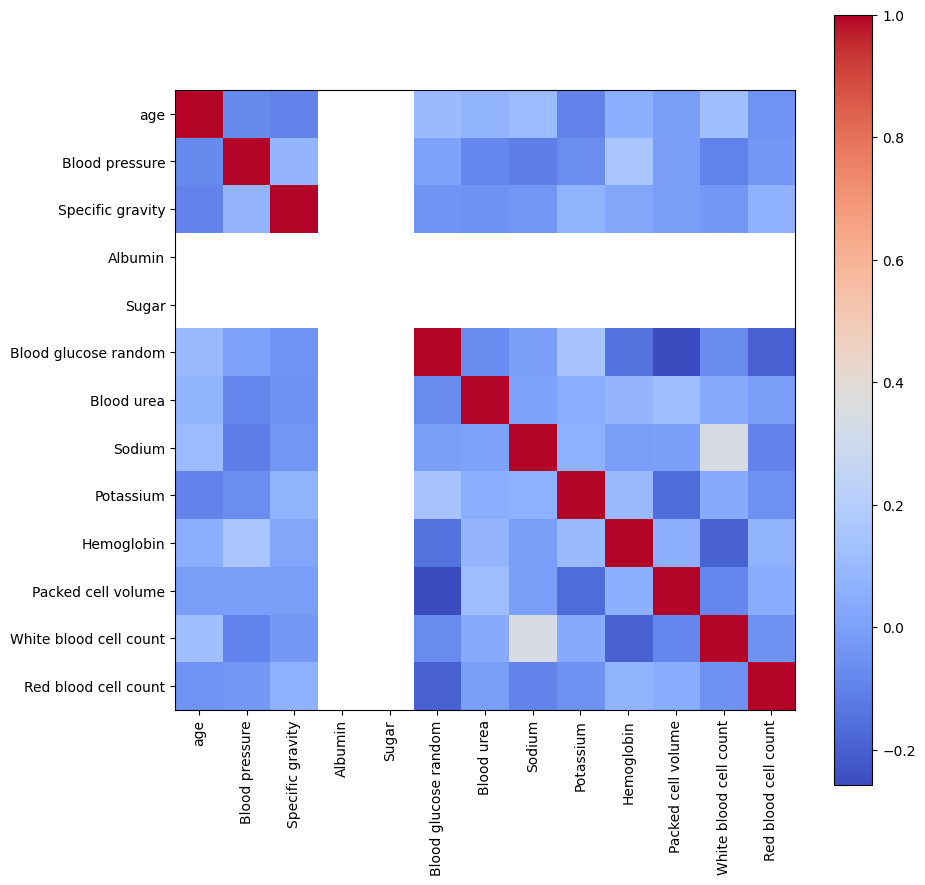

In [114]:
heatmap(control_correlation)